# ORIE 4580/5580/5581 Assignment 3

#### Students: Steve Hwang sh823

### Github link:


### Instructions


* Due Friday September 22, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [1]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

___
___

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


___
**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).
___

In [2]:
# Functions to visualize LCG sequence on clock (see demo notebook)
def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output
def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)


In [3]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)


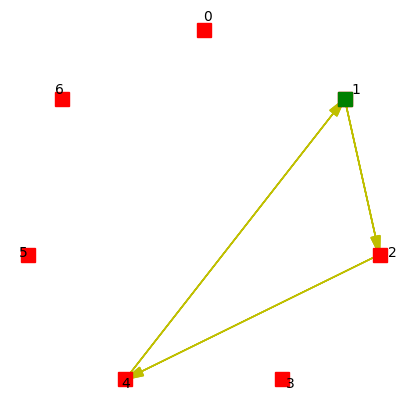

In [11]:
# Ans
m = 7
a = 2
c = 0
seed = 1

fig = plt.figure(figsize=(5,5))
x = LCG(n=m+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

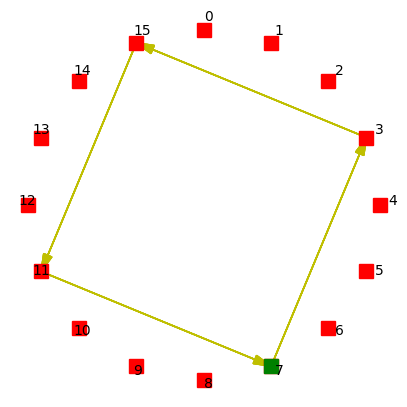

In [12]:
m = 16
a = 5
c = 0
seed = 7

fig = plt.figure(figsize=(5,5))
x = LCG(n=m+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

___
**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.
___

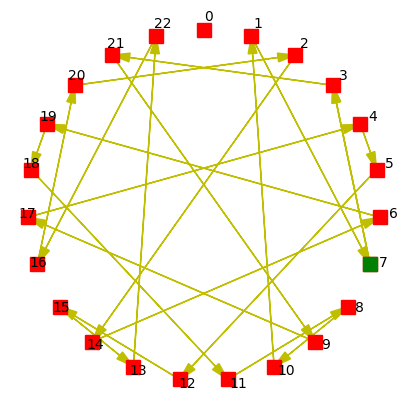

In [13]:
m = 23
a = 7
c = 0
seed = 7

fig = plt.figure(figsize=(5,5))
x = LCG(n=m+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
#plt.axis('equal')
plt.axis('off')
plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.
X: 4
Y: 1
Z: 12

___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.

1. $For \(0 \leq y < \frac{1}{2}\):
   \[F^{-1}(y) = y\]$

2. $For \(\frac{1}{2} \leq y < 1\):
   \[F^{-1}(y) = \frac{1}{2}\]$

3. $For \(y \geq 1\):
   \[F^{-1}(y) = 1\]$


___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

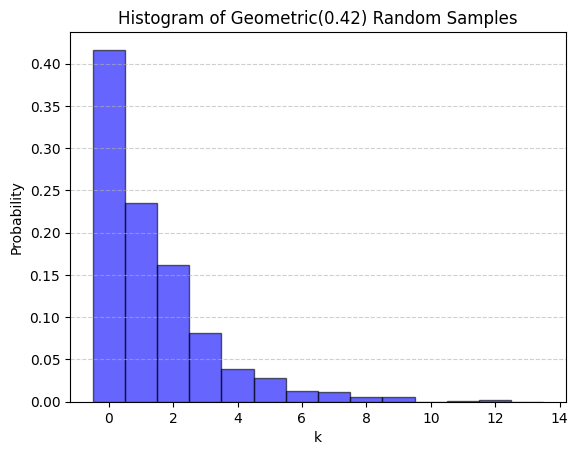

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# Set the parameter for the geometric distribution
p = 0.42

# Number of samples
num_samples = 1000

# Generate random samples using the inversion method
random_samples = np.floor(np.log(1 - np.random.rand(num_samples)) / np.log(1 - p))

# Plot the histogram of the generated samples
plt.hist(random_samples, bins=np.arange(0, max(random_samples) + 1) - 0.5, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('k')
plt.ylabel('Probability')
plt.title('Histogram of Geometric(0.42) Random Samples')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.
1. For $\(0 \leq x \leq 2\)$, the CDF in this range is given by:
   $$F(x) = \int_0^x e^{t-2} dt = e^{-2} \int_0^x e^t dt = e^{-2} (e^x - 1)$$

2. For $\(x > 2\)$, the CDF in this range is given by:
   $$F(x) = \int_2^x e^{-t} dt = -e^{-x} + e^{-2}$$

Now, we'll find the inverse of this combined CDF to use in our inversion algorithm. We'll solve for \(x\) in terms of \(y\):

For $\(0 \leq y \leq e^{-2}\)$:
$$y = e^{-2}(e^x - 1)$$
$$e^x = \frac{y}{e^{-2}} + 1$$
$$x = \ln\left(\frac{y}{e^{-2}} + 1\right) + 2$$

For \(y > e^{-2}\):
$$y = -e^{-x} + e^{-2}$$
$$e^{-x} = e^{-2} - y$$
$$x = -\ln(e^{-2} - y)$$


<ipython-input-15-c8a9742d7e30>:14: RuntimeWarning: invalid value encountered in log
  x = -np.log(np.exp(-2) - u)


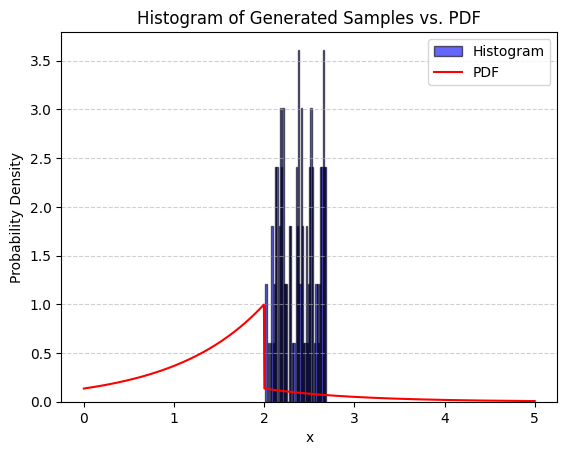

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
num_samples = 1000

# Generate random samples using the inversion method
samples = []
for _ in range(num_samples):
    u = np.random.uniform(0, 1)
    if u <= np.exp(-2):
        x = np.log(u / np.exp(-2) + 1) + 2
    else:
        x = -np.log(np.exp(-2) - u)
    samples.append(x)

# Plot the histogram of the generated samples
plt.hist(samples, bins=50, density=True, alpha=0.6, color='b', edgecolor='black', label='Histogram')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Histogram of Generated Samples vs. PDF')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Plot the PDF for comparison
x_values = np.linspace(0, 5, 1000)
pdf_values = [np.exp(x - 2) if 0 <= x <= 2 else np.exp(-x) for x in x_values]
plt.plot(x_values, pdf_values, 'r', label='PDF')
plt.legend()

plt.show()


___
___

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

___
**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

___

### Ans.


1. For $0 \leq x \leq 1$, the CDF in this range is given by:
   $F(x) = \int_0^x e^{t-2} dt = e^{-2} \int_0^x e^t dt = e^{-2} (e^x - 1)$

2. For $x > 2$, the CDF in this range is given by:
   $F(x) = \int_2^x e^{-t} dt = -e^{-x} + e^{-2}$

Now, we'll find the inverse of this combined CDF to use in our inversion algorithm. We'll solve for $x$ in terms of $y$:

For $0 \leq y \leq e^{-2}$:
$y = e^{-2}(e^x - 1)$
$e^x = \frac{y}{e^{-2}} + 1$
$x = \ln\left(\frac{y}{e^{-2}} + 1\right) + 2$

For $y > e^{-2}$:
$y = -e^{-x} + e^{-2}$
$e^{-x} = e^{-2} - y$
$x = -\ln(e^{-2} - y)$


___
**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?
___

### Ans.


___
**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.
___


___
___

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

___

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.
___

___
**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.
___

### Ans.

___
**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.
___

___
**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.
___

___
**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.
___

### Ans.